In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/ethereum_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1660,2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032
1661,2022-05-28,1724.635986,1757.941772,1724.635986,1757.941772,1757.941772,23214777872
1662,2022-05-29,1792.184448,1818.776611,1765.937378,1812.031006,1812.031006,10642556101
1663,2022-05-30,1811.885986,2005.210815,1804.456055,1996.441284,1996.441284,19580808705


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_55350/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2017-11-09,0.050040
1,2017-11-10,0.045464
2,2017-11-11,0.048727
3,2017-11-12,0.047295
4,2017-11-13,0.049158
...,...,...
1660,2022-05-27,0.347016
1661,2022-05-28,0.354000
1662,2022-05-29,0.365441
1663,2022-05-30,0.404446


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((1605, 60, 1), (1605, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(1605, 60, 1)

In [12]:
X[0], y[0]

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.22608115]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 290ms/step


(array([[0.22734502]], dtype=float32), array([0.22509972]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 17ms/step


array([[1159.1453]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[1148.5300293]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

51/51 [==============================] - 0s 2ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [22]:
y.shape

(1605, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,1148.530029,1159.145264,1083.976562,1126.225464,1116.591553,1115.778442,1115.560913,1163.464966,1109.287354,1115.888428,1153.621704,1119.670166,1162.138550
2018-01-09,1299.739990,1154.443359,1141.948853,1166.728394,1149.264404,1143.242920,1148.882935,1158.772949,1152.372559,1149.704712,1178.685303,1143.798096,1188.119141
2018-01-10,1255.819946,1307.930664,1229.784058,1248.976929,1253.874512,1257.212402,1252.786865,1311.869385,1248.027100,1253.564453,1298.320557,1260.044922,1306.079956
2018-01-11,1154.930054,1263.294067,1269.892212,1295.886963,1271.018799,1264.034058,1273.182983,1267.361450,1274.762817,1274.087402,1298.017456,1262.502808,1307.998901
2018-01-12,1273.199951,1160.928955,1286.152100,1284.516479,1207.041992,1188.139160,1215.284912,1165.244507,1241.620972,1218.800781,1204.619751,1188.121826,1219.199463
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,1724.922852,1823.451050,1958.389893,1973.270752,1868.138794,1851.220581,1881.032227,1825.040894,1924.974609,1890.035034,1853.271606,1872.180786,1863.104492
2022-05-28,1757.941772,1742.311401,1874.260376,1886.121460,1771.134766,1756.040771,1778.922974,1744.378174,1832.951904,1797.514526,1754.466064,1780.481201,1765.101685
2022-05-29,1812.031006,1776.212036,1800.405762,1835.624268,1758.598145,1755.886475,1756.952637,1778.083618,1795.188599,1781.845825,1765.674927,1785.831543,1773.615479


# CNN Meta Model

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

In [26]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,0.225100,0.238314,0.216740,0.230819,0.215287,0.217607,0.219391,0.256953,0.221469,0.227634,0.226969,0.225485,0.230087
2018-01-09,0.257083,0.237266,0.229354,0.239856,0.222350,0.223524,0.226593,0.255826,0.230879,0.234920,0.232342,0.230647,0.235685
2018-01-10,0.247793,0.271481,0.248465,0.258209,0.244962,0.248076,0.249051,0.292586,0.251769,0.257298,0.257990,0.255518,0.261101
2018-01-11,0.226453,0.261530,0.257192,0.268676,0.248668,0.249546,0.253460,0.281900,0.257608,0.261720,0.257925,0.256044,0.261515
2018-01-12,0.251469,0.238712,0.260729,0.266139,0.234839,0.233196,0.240946,0.257380,0.250370,0.249808,0.237902,0.240130,0.242382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,0.347016,0.386398,0.406994,0.419825,0.377740,0.376043,0.384841,0.415804,0.399614,0.394431,0.376964,0.386483,0.381119
2022-05-28,0.354000,0.368311,0.388690,0.400379,0.356772,0.355538,0.362771,0.396436,0.379516,0.374497,0.355782,0.366864,0.360003
2022-05-29,0.365441,0.375868,0.372620,0.389111,0.354062,0.355505,0.358022,0.404529,0.371269,0.371121,0.358185,0.368009,0.361838


Creating a LSTM meta model to predict the next day's closing price.
The meta model will use the predictions of the other models as features

In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.8)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.8)]['Actual']

meta_validation_X = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_validation_y = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_validation_X.shape, meta_validation_y.shape, meta_testing_X.shape, meta_testing_y.shape

((1284, 12), (1284,), (160, 12), (160,), (161, 12), (161,))

In [29]:
meta_training_X

,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,
2018-01-08,0.238314,0.216740,0.230819,0.215287,0.217607,0.219391,0.256953,0.221469,0.227634,0.226969,0.225485,0.230087
2018-01-09,0.237266,0.229354,0.239856,0.222350,0.223524,0.226593,0.255826,0.230879,0.234920,0.232342,0.230647,0.235685
2018-01-10,0.271481,0.248465,0.258209,0.244962,0.248076,0.249051,0.292586,0.251769,0.257298,0.257990,0.255518,0.261101
2018-01-11,0.261530,0.257192,0.268676,0.248668,0.249546,0.253460,0.281900,0.257608,0.261720,0.257925,0.256044,0.261515
2018-01-12,0.238712,0.260729,0.266139,0.234839,0.233196,0.240946,0.257380,0.250370,0.249808,0.237902,0.240130,0.242382
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10,0.465229,0.470076,0.482739,0.440961,0.441223,0.451485,0.500102,0.464241,0.458741,0.442201,0.454841,0.446473
2021-07-11,0.457088,0.452995,0.471887,0.433841,0.434888,0.441729,0.491406,0.453693,0.451264,0.437908,0.448826,0.441578
2021-07-12,0.463607,0.454291,0.468995,0.436455,0.438082,0.441945,0.498370,0.455451,0.452824,0.442861,0.452188,0.446271


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 12, 1)
meta_validation_X = meta_validation_X.to_numpy().reshape(-1, 12, 1)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 12, 1)

meta_training_X.shape, meta_validation_X.shape, meta_testing_X.shape

((1284, 12, 1), (160, 12, 1), (161, 12, 1))

In [31]:
meta_training_X[0]

array([[0.23831408],
       [0.21674022],
       [0.23081869],
       [0.21528736],
       [0.2176073 ],
       [0.21939123],
       [0.25695303],
       [0.2214688 ],
       [0.2276341 ],
       [0.22696877],
       [0.22548494],
       [0.23008722]], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_validation_y = meta_validation_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_validation_y.shape, meta_testing_y.shape

((1284, 1), (160, 1), (161, 1))

In [33]:
meta_training_y[0]

array([0.22509972])

In [34]:
meta_model = keras.Sequential([
    keras.layers.Conv1D(filters = 512, kernel_size = 8, activation = 'ReLU', input_shape = (12, 1)),
    keras.layers.MaxPooling1D(pool_size = 4),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'linear')
])

meta_model.compile(optimizer = Adam(learning_rate=0.00005), loss = 'mse', metrics = ['mae', 'mse'])

In [35]:
meta_model.fit(meta_training_X, meta_training_y, epochs = 500, validation_data = (meta_validation_X, meta_validation_y), batch_size = 512)

Epoch 1/500
3/3 [==============================] - 0s 42ms/step - loss: 0.0388 - mae: 0.1131 - mse: 0.0388 - val_loss: 0.6221 - val_mae: 0.7715 - val_mse: 0.6221
Epoch 2/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0367 - mae: 0.1085 - mse: 0.0367 - val_loss: 0.5944 - val_mae: 0.7540 - val_mse: 0.5944
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0347 - mae: 0.1042 - mse: 0.0347 - val_loss: 0.5676 - val_mae: 0.7366 - val_mse: 0.5676
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0329 - mae: 0.1001 - mse: 0.0329 - val_loss: 0.5415 - val_mae: 0.7192 - val_mse: 0.5415
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 0.0310 - mae: 0.0962 - mse: 0.0310 - val_loss: 0.5146 - val_mae: 0.7010 - val_mse: 0.5146
Epoch 6/500
3/3 [==============================] - 0s 9ms/step - loss: 0.0292 - mae: 0.0922 - mse: 0.0292 - val_loss: 0.4866 - val_mae: 0.6814 - val_mse: 0.4866
Epoch 7/500
3/3 [==============

In [36]:
test_predictions = meta_model.predict(meta_testing_X)
test_results = pd.DataFrame({'Actual': meta_testing_y.flatten(), 'Predicted': test_predictions.flatten()})
test_results

6/6 [==============================] - 0s 613us/step


,Actual,Predicted
0,0.824444,0.798660
1,0.851078,0.797484
2,0.838380,0.811560
3,0.847961,0.808702
4,0.842472,0.813737
...,...,...
156,0.347016,0.375508
157,0.354000,0.356755
158,0.365441,0.355043
159,0.404446,0.362791


In [37]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted'] = scaler.inverse_transform(test_results[['Predicted']])


In [38]:
test_results

,Actual,Predicted
0,3920.653343,3800.983887
1,4044.262758,3795.523193
2,3985.329756,3860.852295
3,4029.798056,3847.588379
4,4004.320595,3870.960205
...,...,...
156,1704.824821,1837.063477
157,1737.238883,1750.023926
158,1790.337279,1742.078369
159,1971.369426,1778.041016


In [39]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [40]:
test_results

,Actual,Predicted
2021-12-22,3920.653343,3800.983887
2021-12-23,4044.262758,3795.523193
2021-12-24,3985.329756,3860.852295
2021-12-25,4029.798056,3847.588379
2021-12-26,4004.320595,3870.960205
...,...,...
2022-05-27,1704.824821,1837.063477
2022-05-28,1737.238883,1750.023926
2022-05-29,1790.337279,1742.078369
2022-05-30,1971.369426,1778.041016


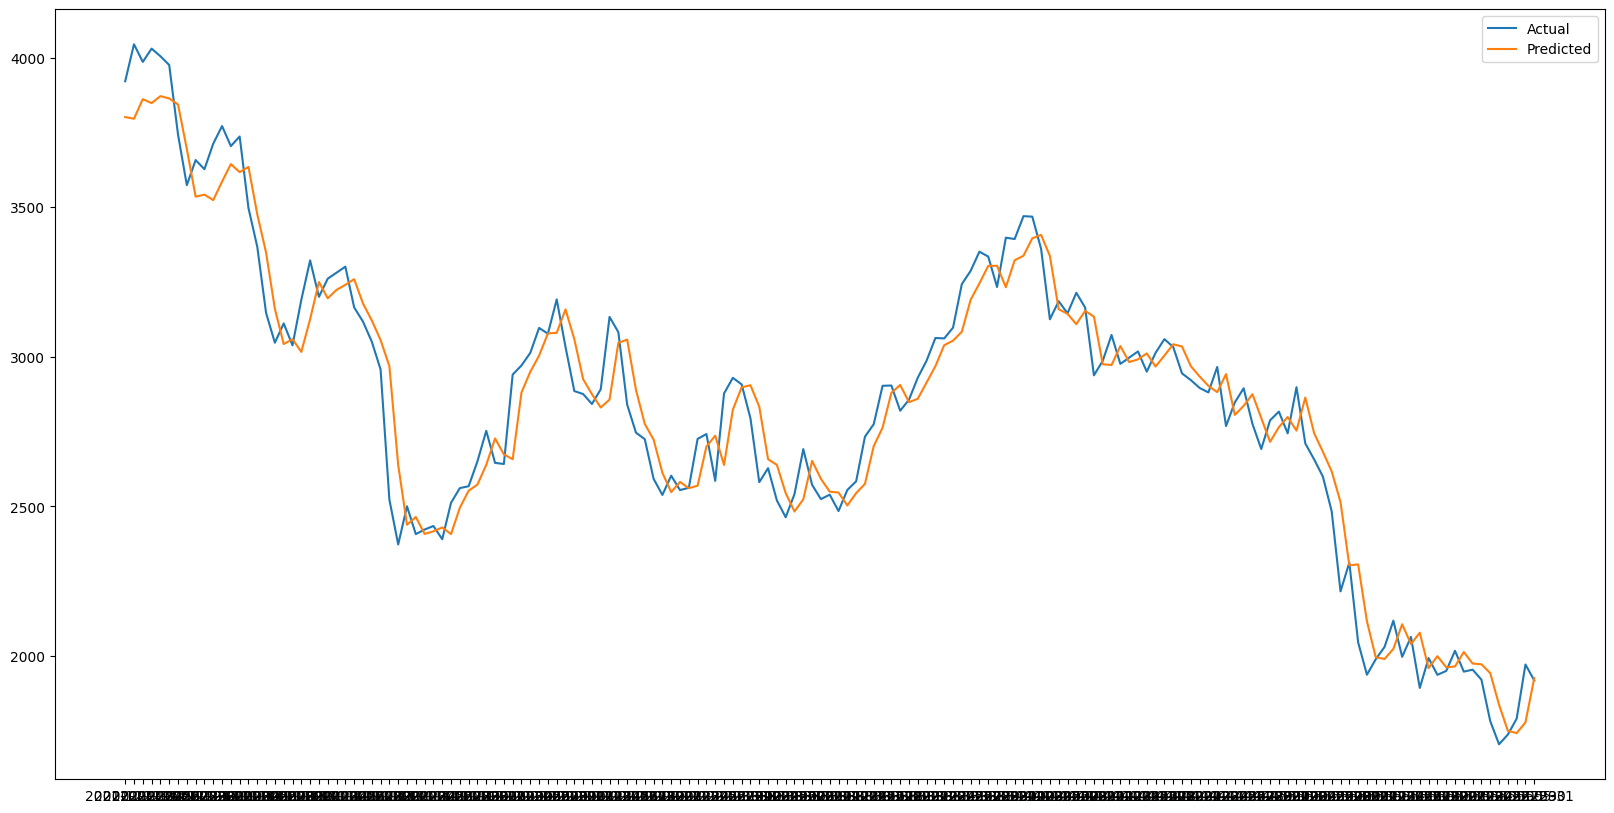

In [41]:
# Plotting the results
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted'], label = 'Predicted')
plt.legend()

In [42]:
rmse = np.sqrt(np.mean((test_results['Actual'] - test_results['Predicted']) ** 2))
mae = np.mean(np.abs(test_results['Actual'] - test_results['Predicted']))
print(f'RMSE: {rmse}, MAE: {mae}')

RMSE: 117.71556322516719, MAE: 93.66674623859556
